# Plots with confidence interval

In [82]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval


parameters = json.load(open("parameters.json"))

max_bellman_iterations = 2
max_bellman_iterations_validation = max_bellman_iterations + 5
seeds = range(1, 21)
n_samples = parameters["n_discrete_states"] * parameters["n_discrete_actions"]
n_weights = parameters["n_weights"]
initial_weight_std = parameters["initial_weight_std"]
ticks_freq = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## General case

### Extract data

In [83]:
fqi_w = np.zeros((len(seeds), max_bellman_iterations + 1, 3))
fqi_pi = np.zeros((len(seeds), max_bellman_iterations + 1))

for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
    fqi_w[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_W_{seed}.npy")
    fqi_pi[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_Pi_{seed}.npy")

lspi_w = np.zeros((len(seeds), max_bellman_iterations + 1, 3))
lspi_pi = np.zeros((len(seeds), max_bellman_iterations + 1))

for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
    lspi_w[idx_seed] = np.load(f"figures/data/LSPI/{max_bellman_iterations}_W_{seed}.npy")
    lspi_pi[idx_seed] = np.load(f"figures/data/LSPI/{max_bellman_iterations}_Pi_{seed}.npy")

optimal_w = np.load(f"figures/data/optimal/W.npy")
optimal_pi = np.load(f"figures/data/optimal/Pi.npy")

pbo_linear_w = np.zeros((len(seeds), max_bellman_iterations_validation + 2, 3))
pbo_linear_pi = np.zeros((len(seeds), max_bellman_iterations_validation + 2))

for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
    pbo_linear_w[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_W_{initial_weight_std}_{seed}.npy")
    pbo_linear_pi[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_Pi_{initial_weight_std}_{seed}.npy")

pbo_custom_linear_w = np.zeros((len(seeds), max_bellman_iterations_validation + 1, 3))
pbo_custom_linear_pi = np.zeros((len(seeds), max_bellman_iterations_validation + 1))

for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
    pbo_custom_linear_w[idx_seed] = np.load(f"figures/data/PBO_custom_linear/{max_bellman_iterations}_W_{n_samples}_{seed}.npy")
    pbo_custom_linear_pi[idx_seed] = np.load(f"figures/data/PBO_custom_linear/{max_bellman_iterations}_Pi_{n_samples}_{seed}.npy")

pbo_optimal_w = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_W.npy")
pbo_optimal_pi = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_Pi.npy")

### Distances with the optimal weights

In [84]:
fqi_w_mean = np.sqrt(np.mean(np.square(fqi_w - optimal_w), axis=2)).mean(axis=0)
fqi_w_std = np.sqrt(np.mean(np.square(fqi_w - optimal_w), axis=2)).std(axis=0)
fqi_w_confidence_interval = confidence_interval(fqi_w_mean, fqi_w_std, len(seeds))

lspi_w_mean = np.sqrt(np.mean(np.square(lspi_w - optimal_w), axis=2)).mean(axis=0)
lspi_w_std = np.sqrt(np.mean(np.square(lspi_w - optimal_w), axis=2)).std(axis=0)
lspi_w_confidence_interval = confidence_interval(lspi_w_mean, lspi_w_std, len(seeds))

pbo_linear_w_mean = np.sqrt(np.mean(np.square(pbo_linear_w - optimal_w), axis=2)).mean(axis=0)
pbo_linear_w_std = np.sqrt(np.mean(np.square(pbo_linear_w - optimal_w), axis=2)).std(axis=0)
pbo_linear_w_confidence_interval = confidence_interval(pbo_linear_w_mean, pbo_linear_w_std, len(seeds))

pbo_custom_linear_w_mean = np.sqrt(np.mean(np.square(pbo_custom_linear_w - optimal_w), axis=2)).mean(axis=0)
pbo_custom_linear_w_std = np.sqrt(np.mean(np.square(pbo_custom_linear_w - optimal_w), axis=2)).std(axis=0)
pbo_custom_linear_w_confidence_interval = confidence_interval(pbo_custom_linear_w_mean, pbo_custom_linear_w_std, len(seeds))

pbo_optimal_w_mean = np.sqrt(np.mean(np.square(pbo_optimal_w - optimal_w), axis=1))

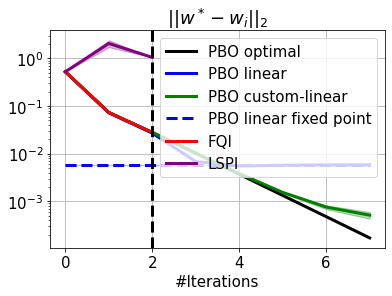

In [85]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_w_mean, label="PBO optimal", color="black")

plt.plot(iterations_validation, pbo_linear_w_mean[:-1], label="PBO linear", color="blue")
plt.fill_between(iterations_validation, pbo_linear_w_confidence_interval[0, :-1], pbo_linear_w_confidence_interval[1, :-1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_custom_linear_w_mean, label="PBO custom-linear", color="green")
plt.fill_between(iterations_validation, pbo_custom_linear_w_confidence_interval[0], pbo_custom_linear_w_confidence_interval[1], color="green", alpha=0.3)

plt.hlines(pbo_linear_w_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="PBO linear fixed point")
plt.fill_between(iterations_validation, pbo_linear_w_confidence_interval[0, -1], pbo_linear_w_confidence_interval[1, -1], color="blue", alpha=0.3)

plt.plot(iterations, fqi_w_mean, label="FQI", color="red")
plt.fill_between(iterations, fqi_w_confidence_interval[0], fqi_w_confidence_interval[1], color="red", alpha=0.3)

plt.plot(iterations, lspi_w_mean, label="LSPI", color="purple")
plt.fill_between(iterations, lspi_w_confidence_interval[0], lspi_w_confidence_interval[1], color="purple", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.yscale("log")
plt.title(r"$|| w^* - w_i ||_2$")
plt.legend().set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/distance_to_optimal_W_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Distance to optimal value function

In [86]:
fqi_pi_mean = np.abs(fqi_pi - optimal_pi).mean(axis=0)
fqi_pi_std = np.abs(fqi_pi - optimal_pi).std(axis=0)
fqi_pi_confidence_interval = confidence_interval(fqi_pi_mean, fqi_pi_std, len(seeds))

lspi_pi_mean = np.abs(lspi_pi - optimal_pi).mean(axis=0)
lspi_pi_std = np.abs(lspi_pi - optimal_pi).std(axis=0)
lspi_pi_confidence_interval = confidence_interval(lspi_pi_mean, lspi_pi_std, len(seeds))

pbo_linear_pi_mean = np.abs(pbo_linear_pi - optimal_pi).mean(axis=0)
pbo_linear_pi_std = np.abs(pbo_linear_pi - optimal_pi).std(axis=0)
pbo_linear_pi_confidence_interval = confidence_interval(pbo_linear_pi_mean, pbo_linear_pi_std, len(seeds))

pbo_custom_linear_pi_mean = np.abs(pbo_custom_linear_pi - optimal_pi).mean(axis=0)
pbo_custom_linear_pi_std = np.abs(pbo_custom_linear_pi - optimal_pi).std(axis=0)
pbo_custom_linear_pi_confidence_interval = confidence_interval(pbo_custom_linear_pi_mean, pbo_custom_linear_pi_std, len(seeds))

pbo_optimal_pi_mean = np.abs(pbo_optimal_pi - optimal_pi)

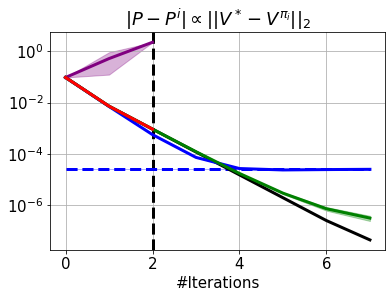

In [87]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_linear_pi_mean[:-1], label="PBO linear", color="blue", zorder=7)
plt.fill_between(iterations_validation, pbo_linear_pi_confidence_interval[0, :-1], pbo_linear_pi_confidence_interval[1, :-1], color="blue", alpha=0.3)

plt.hlines(pbo_linear_pi_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="PBO linear fixed point", zorder=3)
plt.fill_between(iterations_validation, pbo_linear_pi_confidence_interval[0, -1], pbo_linear_pi_confidence_interval[1, -1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_custom_linear_pi_mean, label="PBO deep", color="green", zorder=8)
plt.fill_between(iterations_validation, pbo_custom_linear_pi_confidence_interval[0], pbo_custom_linear_pi_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations, fqi_pi_mean, label="FQI", color="red", zorder=9)
plt.fill_between(iterations, fqi_pi_confidence_interval[0], fqi_pi_confidence_interval[1], color="red", alpha=0.3)

plt.plot(iterations, lspi_pi_mean, label="LSPI", color="purple", zorder=5)
plt.fill_between(iterations, lspi_pi_confidence_interval[0], lspi_pi_confidence_interval[1], color="purple", alpha=0.3)

plt.plot(iterations_validation, pbo_optimal_pi_mean, label="PBO optimal", color="black", zorder=4)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.yscale("log")
plt.title(r"$|P - P^i| \propto || V^* - V^{\pi_i} ||_2$")
# plt.legend().set_zorder(10)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/distance_to_optimal_Pi_{max_bellman_iterations}.pdf", bbox_inches='tight')

## Visualise

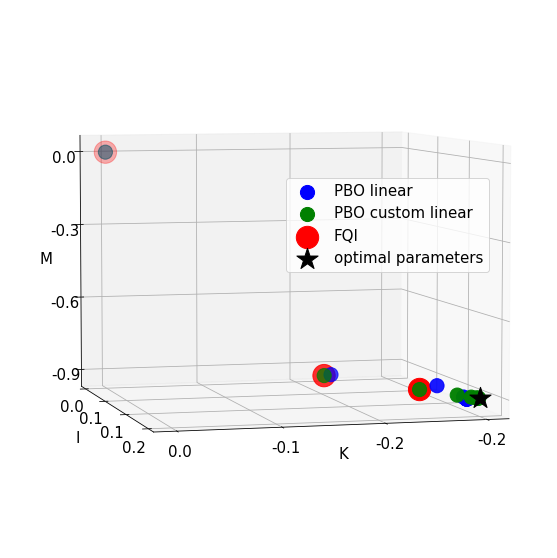

In [88]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(pbo_linear_w[0, :, 0], pbo_linear_w[0, :, 1], pbo_linear_w[0, :, 2], label='PBO linear', color="blue", s=200, zorder=4)
ax.scatter(pbo_custom_linear_w[0, :, 0], pbo_custom_linear_w[0, :, 1], pbo_custom_linear_w[0, :, 2], label='PBO custom linear', color="green", s=200, zorder=5)
ax.scatter(fqi_w[0, :, 0], fqi_w[0, :, 1], fqi_w[0, :, 2], label='FQI', color="red", s=500, zorder=2)
# ax.scatter(lspi_w[0, :, 0], lspi_w[0, :, 1], lspi_w[0, :, 2], label='LSPI', color="purple", s=np.linspace(600, 60, max_bellman_iterations+ 1), zorder=3)
# ax.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO optimal', color="black", s=np.linspace(100, 10, max_bellman_iterations_validation + 1), zorder=1)
ax.scatter(optimal_w[0], optimal_w[1], optimal_w[2], label='optimal parameters', color="black", marker="*", s=500, zorder=0)

plt.legend(bbox_to_anchor=(0.9, 0.7))
ax.view_init(5, 75)
ax.set_xlabel("K")
ax.set_xticks(np.linspace(0, optimal_w[0], 4), labels=np.around(np.linspace(0, optimal_w[0], 4), 1))
ax.set_ylabel("I", labelpad=10)
ax.set_yticks(np.linspace(0, optimal_w[1], 4), labels=np.around(np.linspace(0, optimal_w[1], 4), 1))
ax.set_zlabel("M")
ax.set_zticks(np.linspace(0, optimal_w[2], 4), labels=np.around(np.linspace(0, optimal_w[2], 4), 1))
_ = plt.savefig(f"figures/visu_3D_{max_bellman_iterations}.pdf", bbox_inches='tight')